In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("Social_Network_Ads.csv")
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=0)
classifier.fit(x_train,y_train)

In [ ]:
print(classifier.predict(sc.transform([[34,87000]])))

In [ ]:
y_pred=classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

<ipython-input-11-2bdd8c9717b4>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('blue', 'yellow'))(i), label = j)


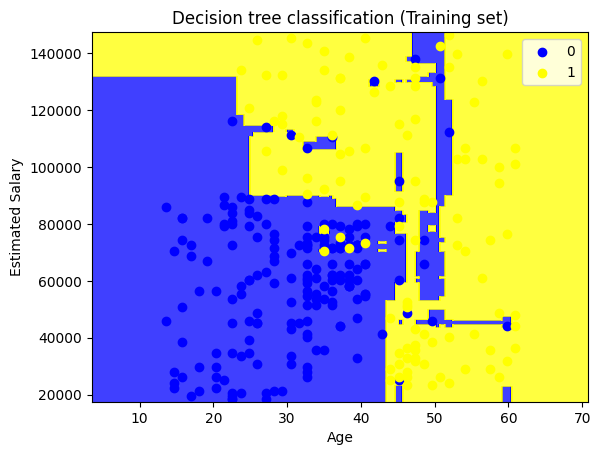

In [11]:
from matplotlib.colors import ListedColormap
x_set,y_set=sc.inverse_transform(x_train),y_train
x1,x2=np.meshgrid(np.arange(start = x_set[:, 0].min() - 10, stop = x_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = x_set[:, 1].min() - 1000, stop = x_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(x1, x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'yellow')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('blue', 'yellow'))(i), label = j)
plt.title('Decision tree classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<ipython-input-12-d345b9385ed4>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('blue', 'yellow'))(i), label = j)


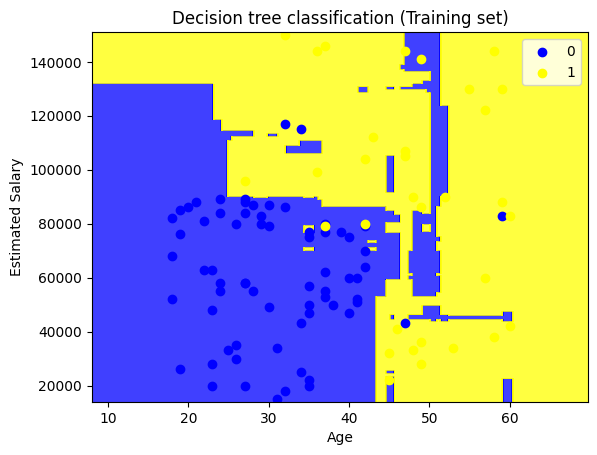

In [12]:
from matplotlib.colors import ListedColormap
x_set,y_set=sc.inverse_transform(x_test),y_test
x1,x2=np.meshgrid(np.arange(start = x_set[:, 0].min() - 10, stop = x_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = x_set[:, 1].min() - 1000, stop = x_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(x1, x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'yellow')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('blue', 'yellow'))(i), label = j)
plt.title('Decision tree classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()